In [1]:
# Import libraries
import chardet
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [2]:
# Function to detect the encoding type of a file and print the detected encoding type.
def get_encoding(file_path: str)->str:
  """
  Detects the encoding type of the file.

  Parameters:
  - file_path (str): The path to the file.

  Returns:
  - str: The encoding type of the file.
  """

  # Open the file in binary mode
  with open(file_path, 'rb') as f:
    raw_data = f.read()
  output_dict = chardet.detect(raw_data)
  encoding = output_dict["encoding"]
  confidence = output_dict["confidence"]
  return encoding, confidence

# Specify the path to your CSV file
file_path = "/content/Casestudy_Data.csv"

encoding, confidence = get_encoding(file_path)
print (f"{str(encoding):<5} : Detected Encoding Type")
print (f"{str(confidence):<5} : Confidence")

ascii : Detected Encoding Type
1.0   : Confidence


In [3]:
data = pd.read_csv(file_path, encoding=encoding)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56.0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57.0,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37.0,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no
3,40.0,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56.0,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,NaN,-36.4,4.857,5191.0,no


In [4]:
# Display the number of rows and columns in the dataset
data_dimensions = data.shape
rows = data_dimensions[0]
columns = data_dimensions[1]

print (f"{str(rows):<6} : Number of Rows in the dataset")
print (f"{str(columns):<6} : Number of Columns in the dataset")

41188  : Number of Rows in the dataset
21     : Number of Columns in the dataset


In [5]:
X = data.drop(columns='y')
y = data[['y']]

In [6]:
y.value_counts()

y  
no     36548
yes     4640
dtype: int64

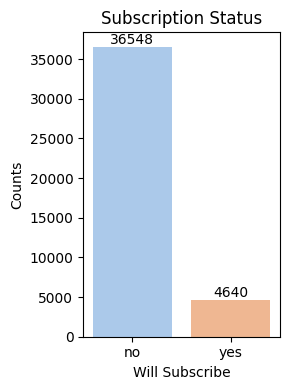

In [7]:
plt.figure(figsize=(3,4))
ax = sns.countplot(x='y',data=data,palette="pastel")
for i in ax.containers:
    ax.bar_label(i,)

plt.ylabel("Counts")
plt.xlabel("Will Subscribe")
plt.title("Subscription Status")

plt.tight_layout()
plt.show()

In [8]:
# Display the number of numerical cols and categorical cols in the dataset
numerical_columns = X.select_dtypes(include=['number']).columns
categorical_columns = X.select_dtypes(include=['object']).columns

print (f"{str(len(numerical_columns)):<3} : Number of numerical columns")
print (f"{str(len(categorical_columns)):<3} : Number of Categorical columns")

10  : Number of numerical columns
10  : Number of Categorical columns


In [9]:
print (f"Numerical columns : {numerical_columns.tolist()}")
print (f"Categorical columns : {categorical_columns.tolist()}")

Numerical columns : ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
Categorical columns : ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


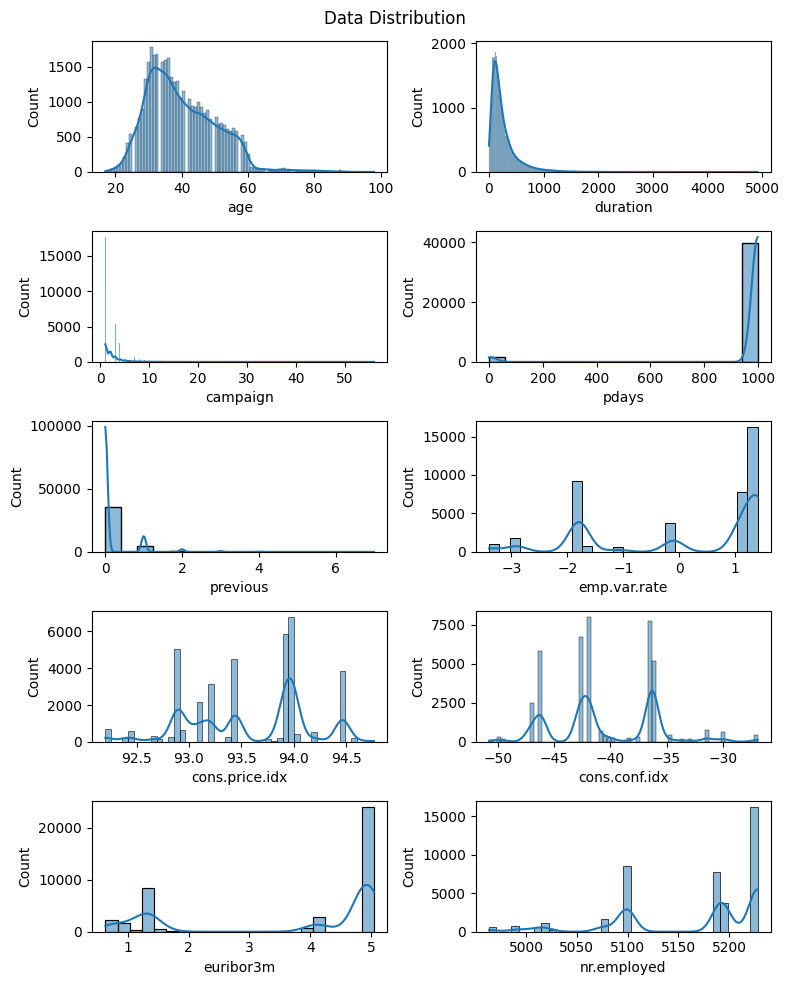

In [10]:
n_rows = 5
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(8, 10))

for idx, colm in enumerate(numerical_columns):
  row = idx // n_cols
  col = idx % n_cols
  sns.histplot(data=X, x=colm, kde=True, ax= ax[row, col])

fig.suptitle('Data Distribution')
plt.tight_layout()
plt.show()

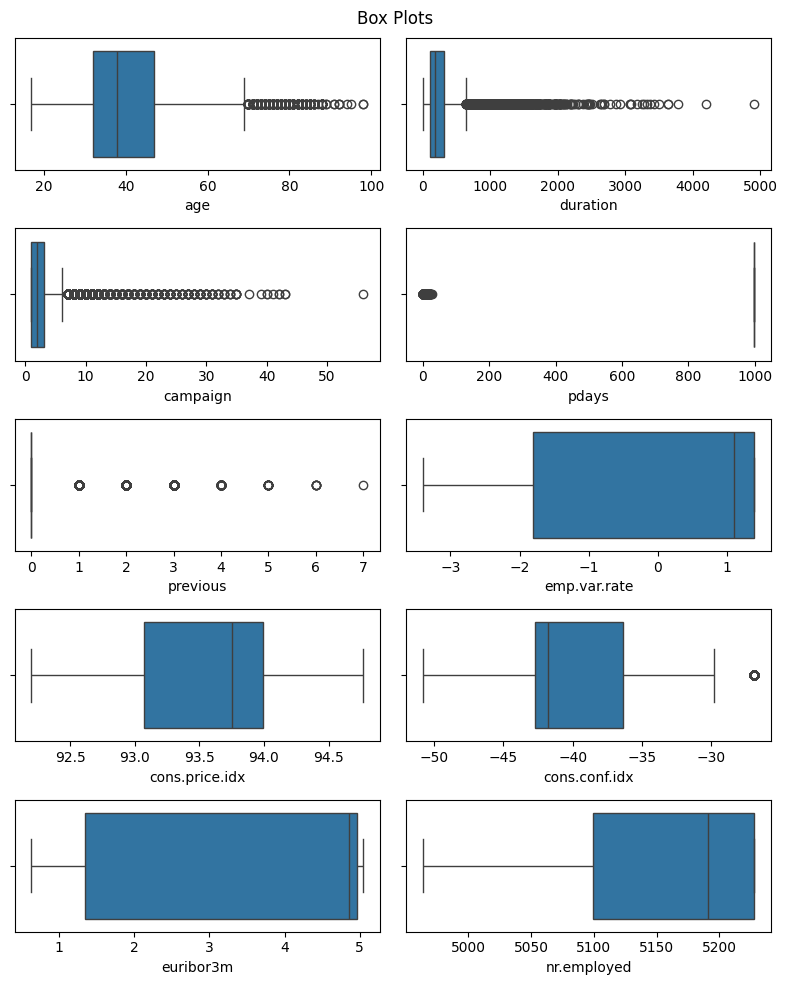

In [11]:
n_rows = 5
n_cols = 2
fig, ax = plt.subplots(n_rows, n_cols, figsize=(8, 10))

for idx, colm in enumerate(numerical_columns):
  row = idx // n_cols
  col = idx % n_cols
  sns.boxplot(data=X, x=colm, ax= ax[row, col])

fig.suptitle('Box Plots')
plt.tight_layout()
plt.show()

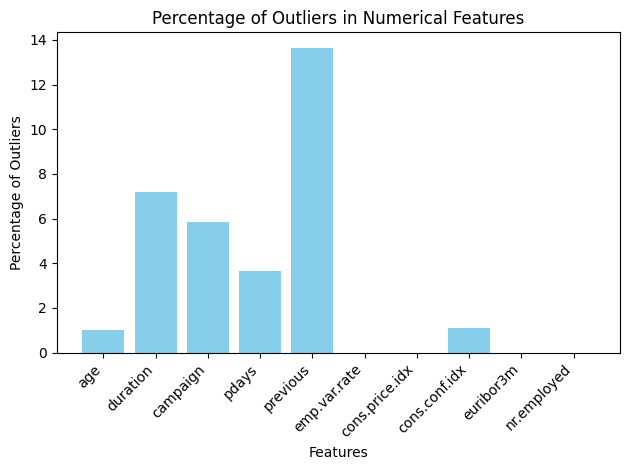

In [12]:
outlier_percentages = {}

for column in numerical_columns:

    Q1 = X[column].quantile(q=0.25)
    Q3 = X[column].quantile(q=0.75)
    IQR = Q3 - Q1

    upper_fence = Q3 + (1.5 * IQR)
    lower_fence = Q1 - (1.5 * IQR)

    outliers = (X[column] > upper_fence) | (X[column] < lower_fence)

    outlier_percentage = outliers.sum() / len(X[column]) * 100

    outlier_percentages[column] = outlier_percentage

features = list(outlier_percentages.keys())
percentages = list(outlier_percentages.values())

# Plot the bar graph
plt.figure(figsize=(6.4, 4.8))
plt.bar(features, percentages, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Percentage of Outliers')
plt.title('Percentage of Outliers in Numerical Features')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<Figure size 1600x600 with 0 Axes>

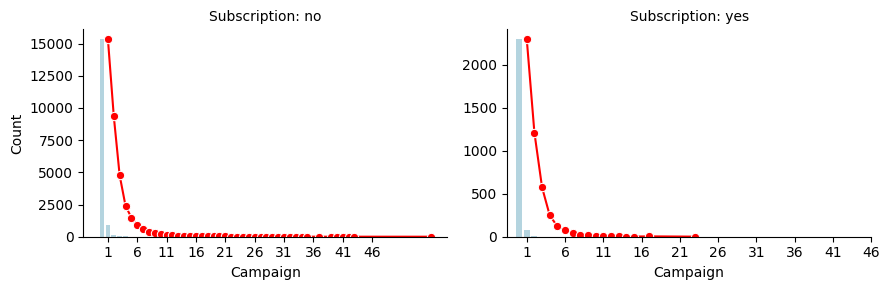

In [13]:
campaign_counts = data.groupby(['campaign', 'y']).size().reset_index(name='count')

plt.figure(figsize=(16, 6))
g = sns.FacetGrid(campaign_counts, col='y', sharex=False, sharey=False, aspect=1.5)

g.map(sns.barplot, 'campaign', 'count', order=range(1, 51, 5), color='lightblue')

g.map(sns.lineplot, 'campaign', 'count', marker='o', color='red')

g.set(xticks=range(1, 51, 5), xticklabels=range(1, 51, 5))

g.set_titles('Subscription: {col_name}')
g.set_axis_labels('Campaign', 'Count')

plt.tight_layout()
plt.show()

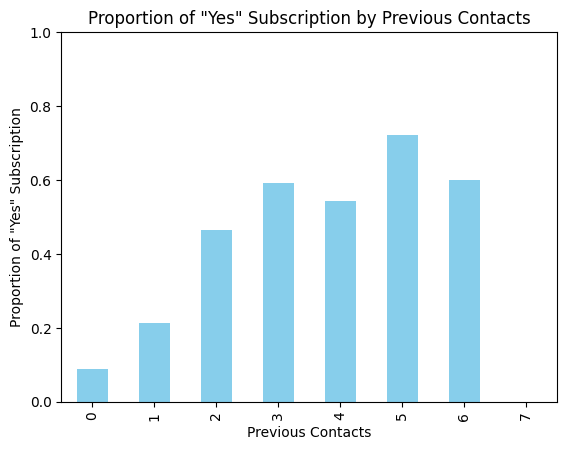

In [14]:
prop_yes = data.groupby('previous')['y'].value_counts(normalize=True).unstack()['yes']

# Create a bar plot of the proportions
plt.figure(figsize=(6.4, 4.8))
prop_yes.plot(kind='bar', color='skyblue')
plt.title('Proportion of "Yes" Subscription by Previous Contacts')
plt.xlabel('Previous Contacts')
plt.ylabel('Proportion of "Yes" Subscription')
plt.ylim(0, 1)
plt.show()

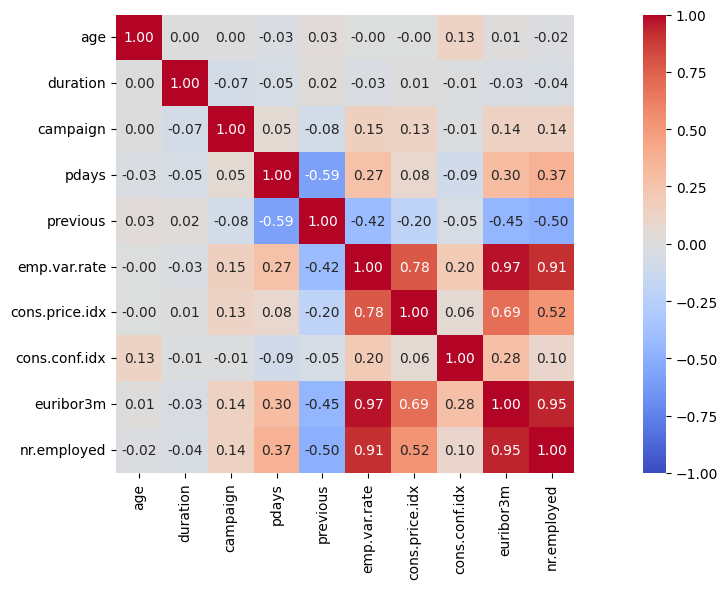

In [15]:
plt.figure(figsize=(14, 6))
sns.heatmap(
    X.corr(), annot=True, cmap='coolwarm',
    fmt=".2f", vmin=-1, vmax=1, square=True
    )

plt.tight_layout()
plt.show()

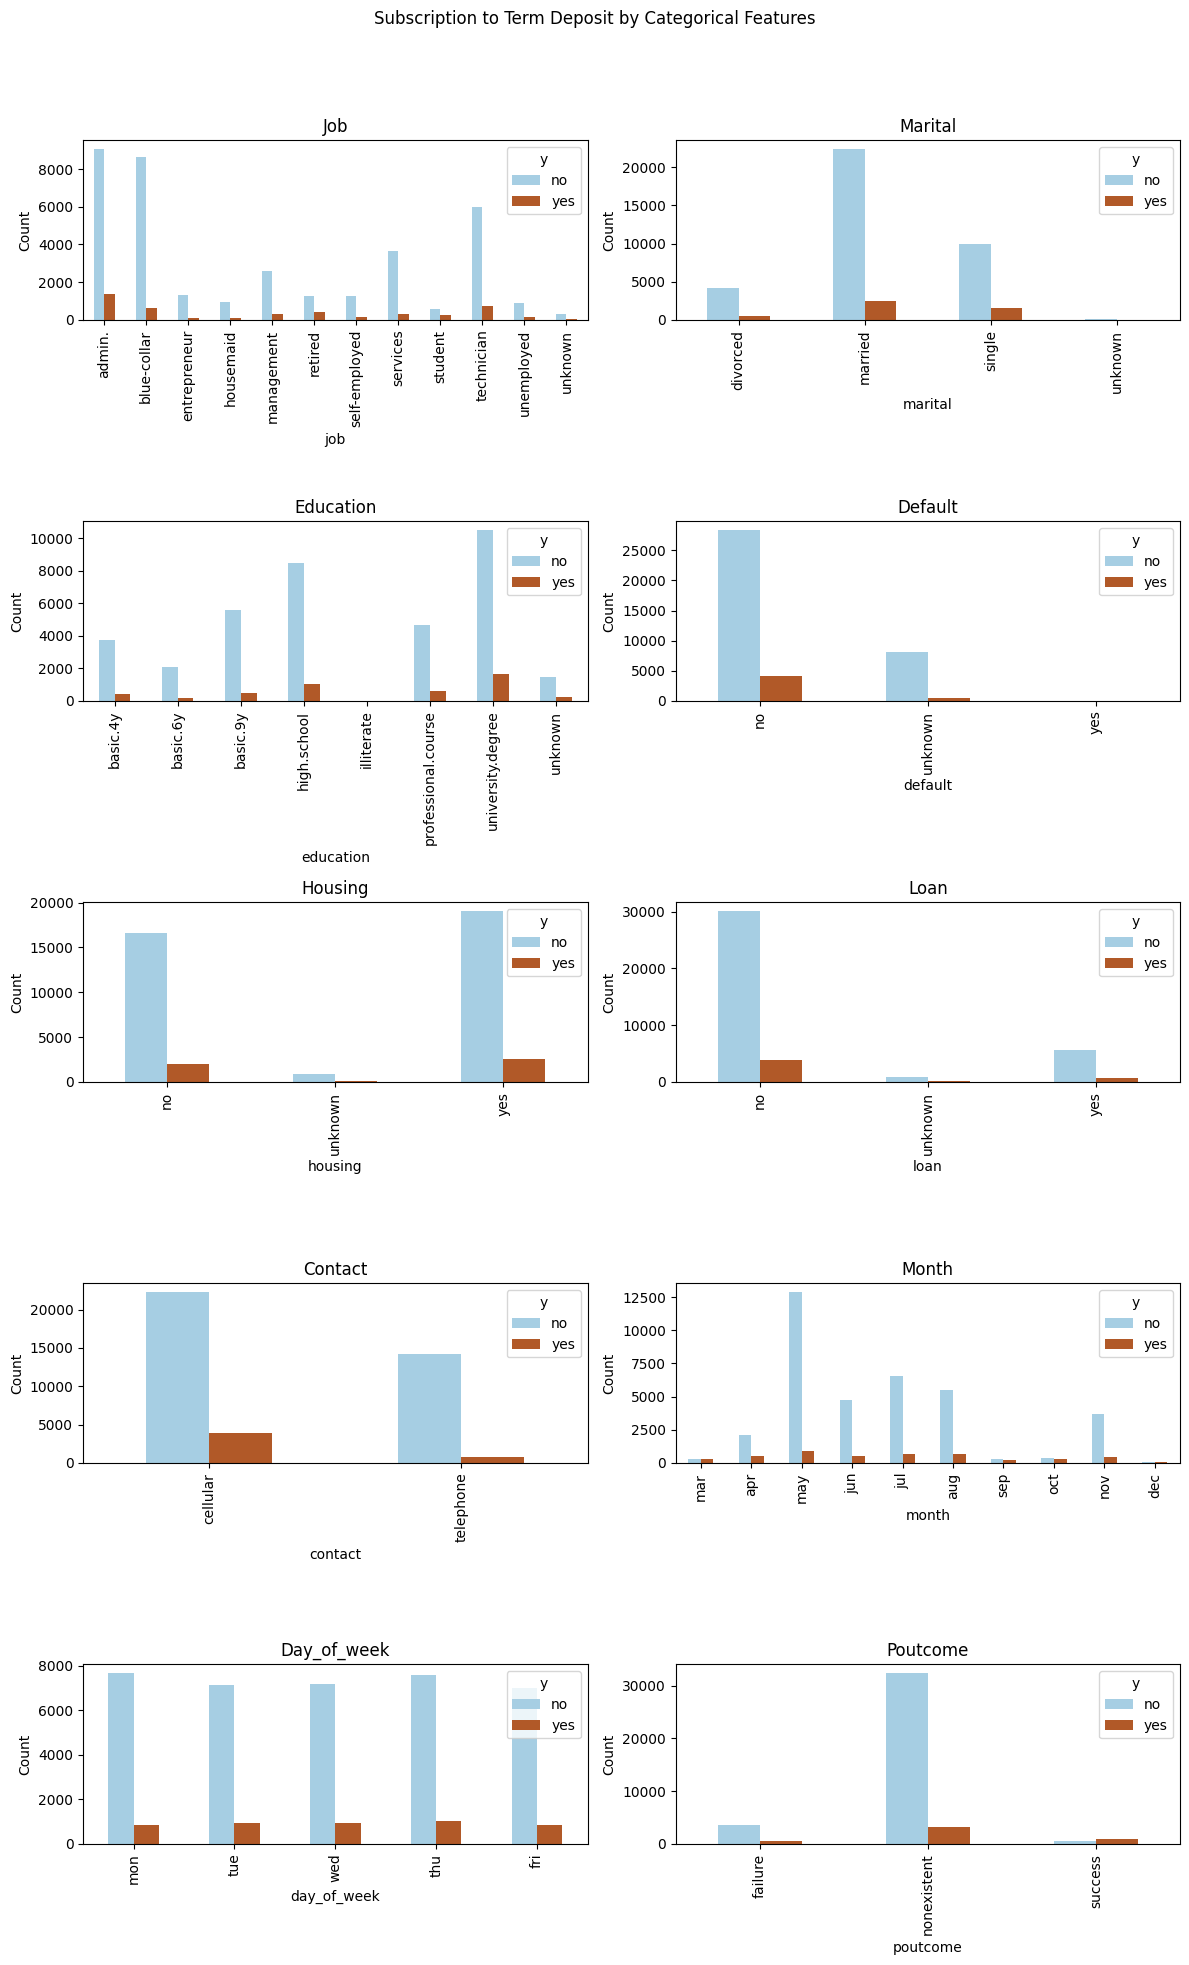

In [95]:
# Relationship between categorical features and subscription to term deposit
n_rows = 5
n_cols = 2
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 20))
fig.suptitle('Subscription to Term Deposit by Categorical Features')

for i, column in enumerate(categorical_columns):

    subscription_counts_by_category = data.groupby(column)['y'].value_counts().unstack()

    ax = axes[i // n_cols, i % n_cols]
    subscription_counts_by_category.plot(kind='bar', colormap='Paired', stacked=False, ax=ax)

    ax.tick_params(axis='x')
    ax.set_title(f'{column.capitalize()}')
    ax.set_xlabel(f'{column}')
    ax.set_ylabel('Count')

plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

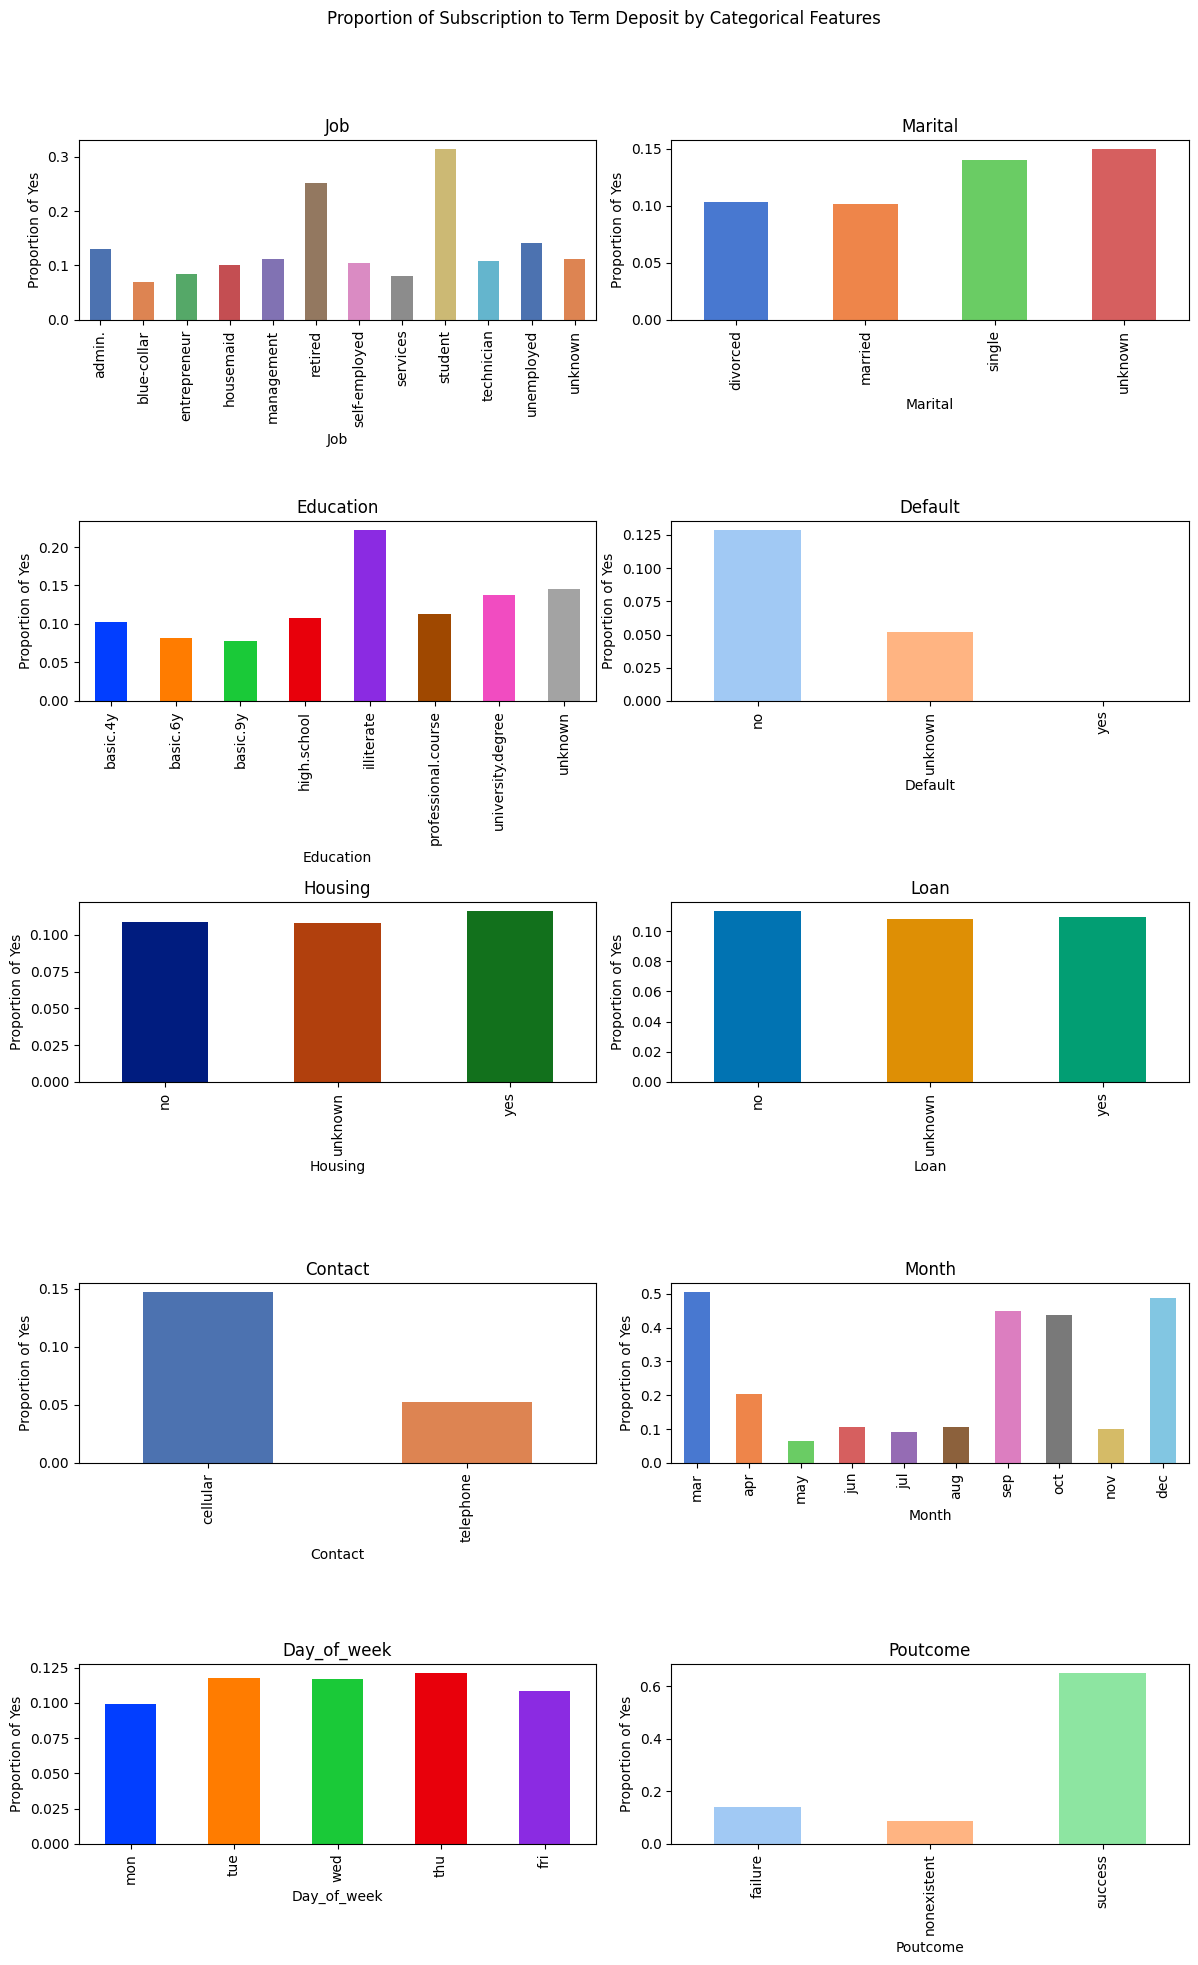

In [87]:
import matplotlib.pyplot as plt

# Define a list of Seaborn color palettes to use for the bars
palettes = ['deep', 'muted', 'bright', 'pastel', 'dark', 'colorblind']

# Calculate the number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols  # Round up to ensure enough space

# Create the subplot grid
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
fig.suptitle('Proportion of Subscription to Term Deposit by Categorical Features')

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, column in enumerate(categorical_columns):
    subscription_counts_by_category = data.groupby(column)['y'].value_counts(normalize=True).unstack()

    # Calculate the proportion of 'yes' to 'no'
    proportion_yes = subscription_counts_by_category['yes'] / (subscription_counts_by_category['yes'] + subscription_counts_by_category['no'])

    current_palette = sns.color_palette(palettes[i % len(palettes)], n_colors=len(proportion_yes))
    ax = axes[i]
    proportion_yes.plot(kind='bar', ax=ax, color=current_palette)

    ax.tick_params(axis='x')
    ax.set_title(f'{column.capitalize()}')
    ax.set_xlabel(column.capitalize())
    ax.set_ylabel('Proportion of Yes')

# Hide any unused axes
for i in range(len(categorical_columns), len(axes)):
    axes[i].axis('off')

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

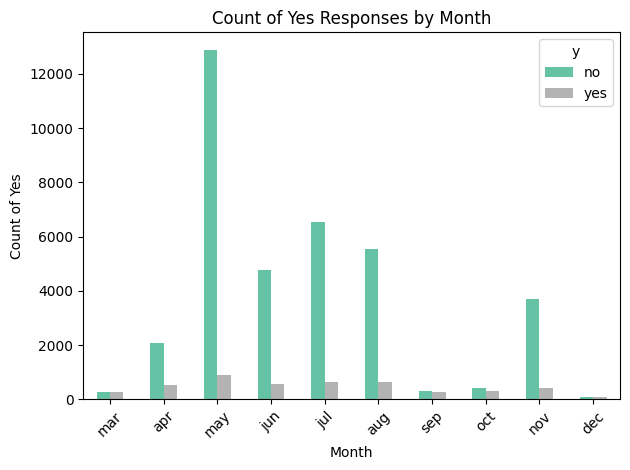

In [97]:
unique_months = data['month'].unique()

month_order = [m for m in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] if m in unique_months]

data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

month_counts = data.groupby('month')['y'].value_counts().unstack()

# Calculate the proportion of 'yes' responses
month_proportions = month_counts['yes'] / (month_counts['yes'] + month_counts['no'])

color_palette2 = 'Set2'

month_counts.plot(kind='bar', colormap=color_palette2)
plt.xlabel('Month')
plt.ylabel('Count of Yes')
plt.title('Count of Yes Responses by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

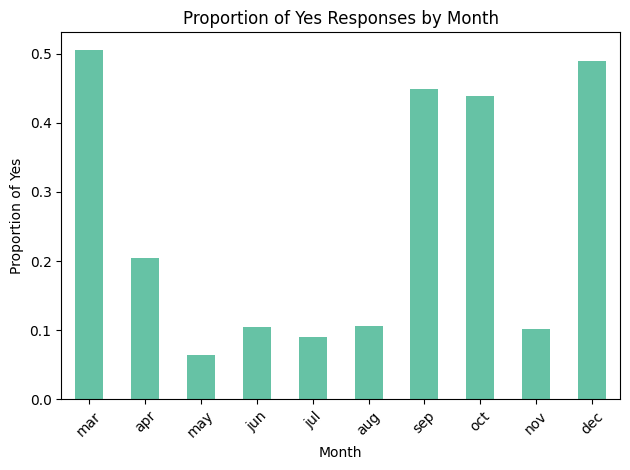

In [74]:
unique_months = data['month'].unique()

month_order = [m for m in ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'] if m in unique_months]

data['month'] = pd.Categorical(data['month'], categories=month_order, ordered=True)

month_counts = data.groupby('month')['y'].value_counts().unstack()

# Calculate the proportion of 'yes' responses
month_proportions = month_counts['yes'] / (month_counts['yes'] + month_counts['no'])

color_palette2 = 'Set2'

month_proportions.plot(kind='bar', colormap=color_palette2)
plt.xlabel('Month')
plt.ylabel('Proportion of Yes')
plt.title('Proportion of Yes Responses by Month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

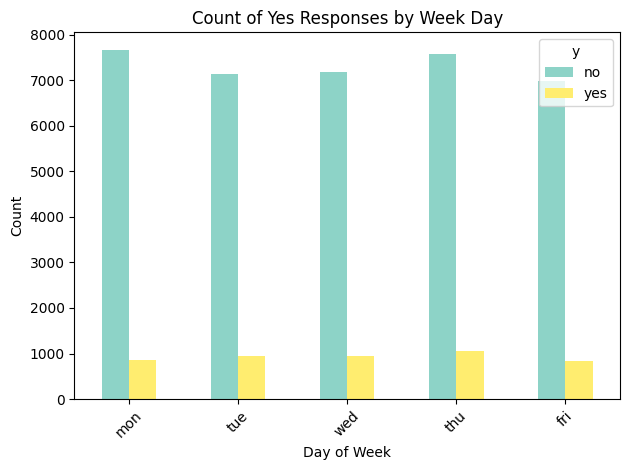

In [84]:
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=day_order, ordered=True)

week_counts = data.groupby('day_of_week')['y'].value_counts().unstack()
week_counts.plot(kind='bar', colormap='Set3')
plt.title('Count of Yes Responses by Week Day')
plt.ylabel('Count')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

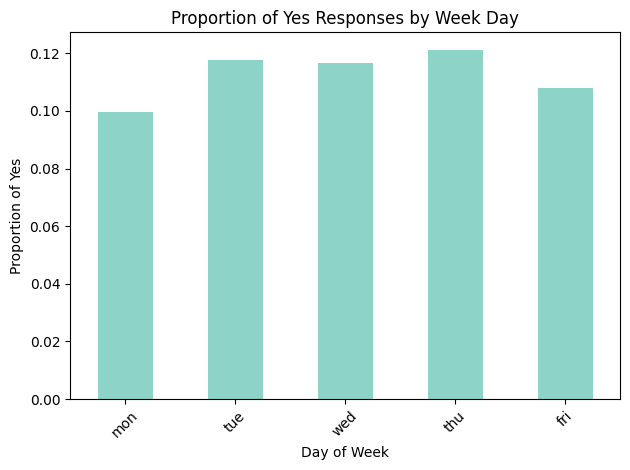

In [86]:
day_order = ['mon', 'tue', 'wed', 'thu', 'fri']

data['day_of_week'] = pd.Categorical(data['day_of_week'], categories=day_order, ordered=True)

week_counts = data.groupby('day_of_week')['y'].value_counts().unstack()

week_proportions = week_counts['yes'] / (week_counts['yes'] +  week_counts['no'])

week_proportions.plot(kind='bar', colormap='Set3')
plt.title('Proportion of Yes Responses by Week Day')
plt.ylabel('Proportion of Yes')
plt.xlabel('Day of Week')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

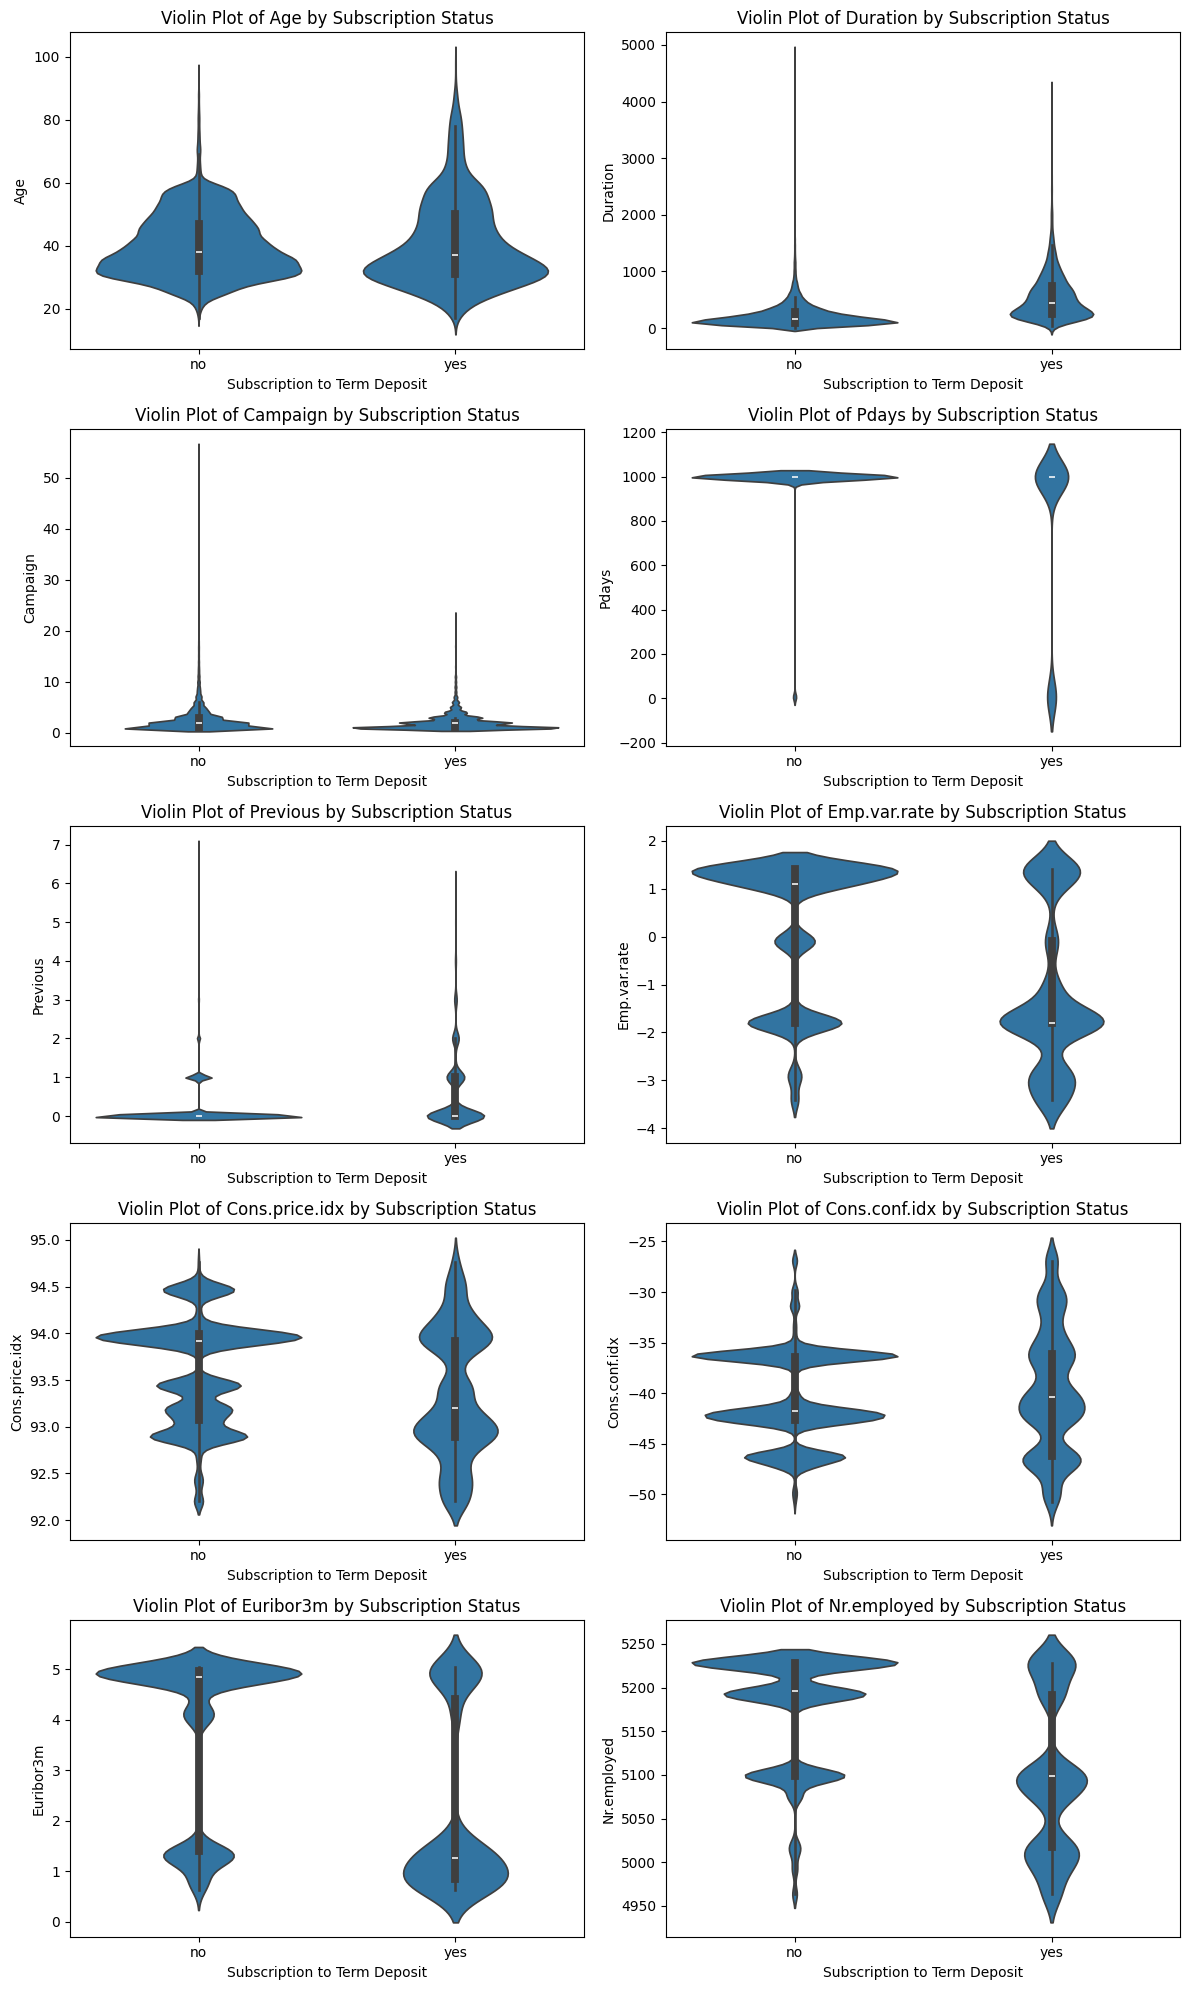

In [17]:
# Relationship between numerical features and subscription to term deposit
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2

    sns.violinplot(x='y', y=column, data=data, ax=axes[row, col])
    axes[row, col].set_xlabel('Subscription to Term Deposit')
    axes[row, col].set_ylabel(column.capitalize())
    axes[row, col].set_title(f'Violin Plot of {column.capitalize()} by Subscription Status')

plt.tight_layout()
plt.show()

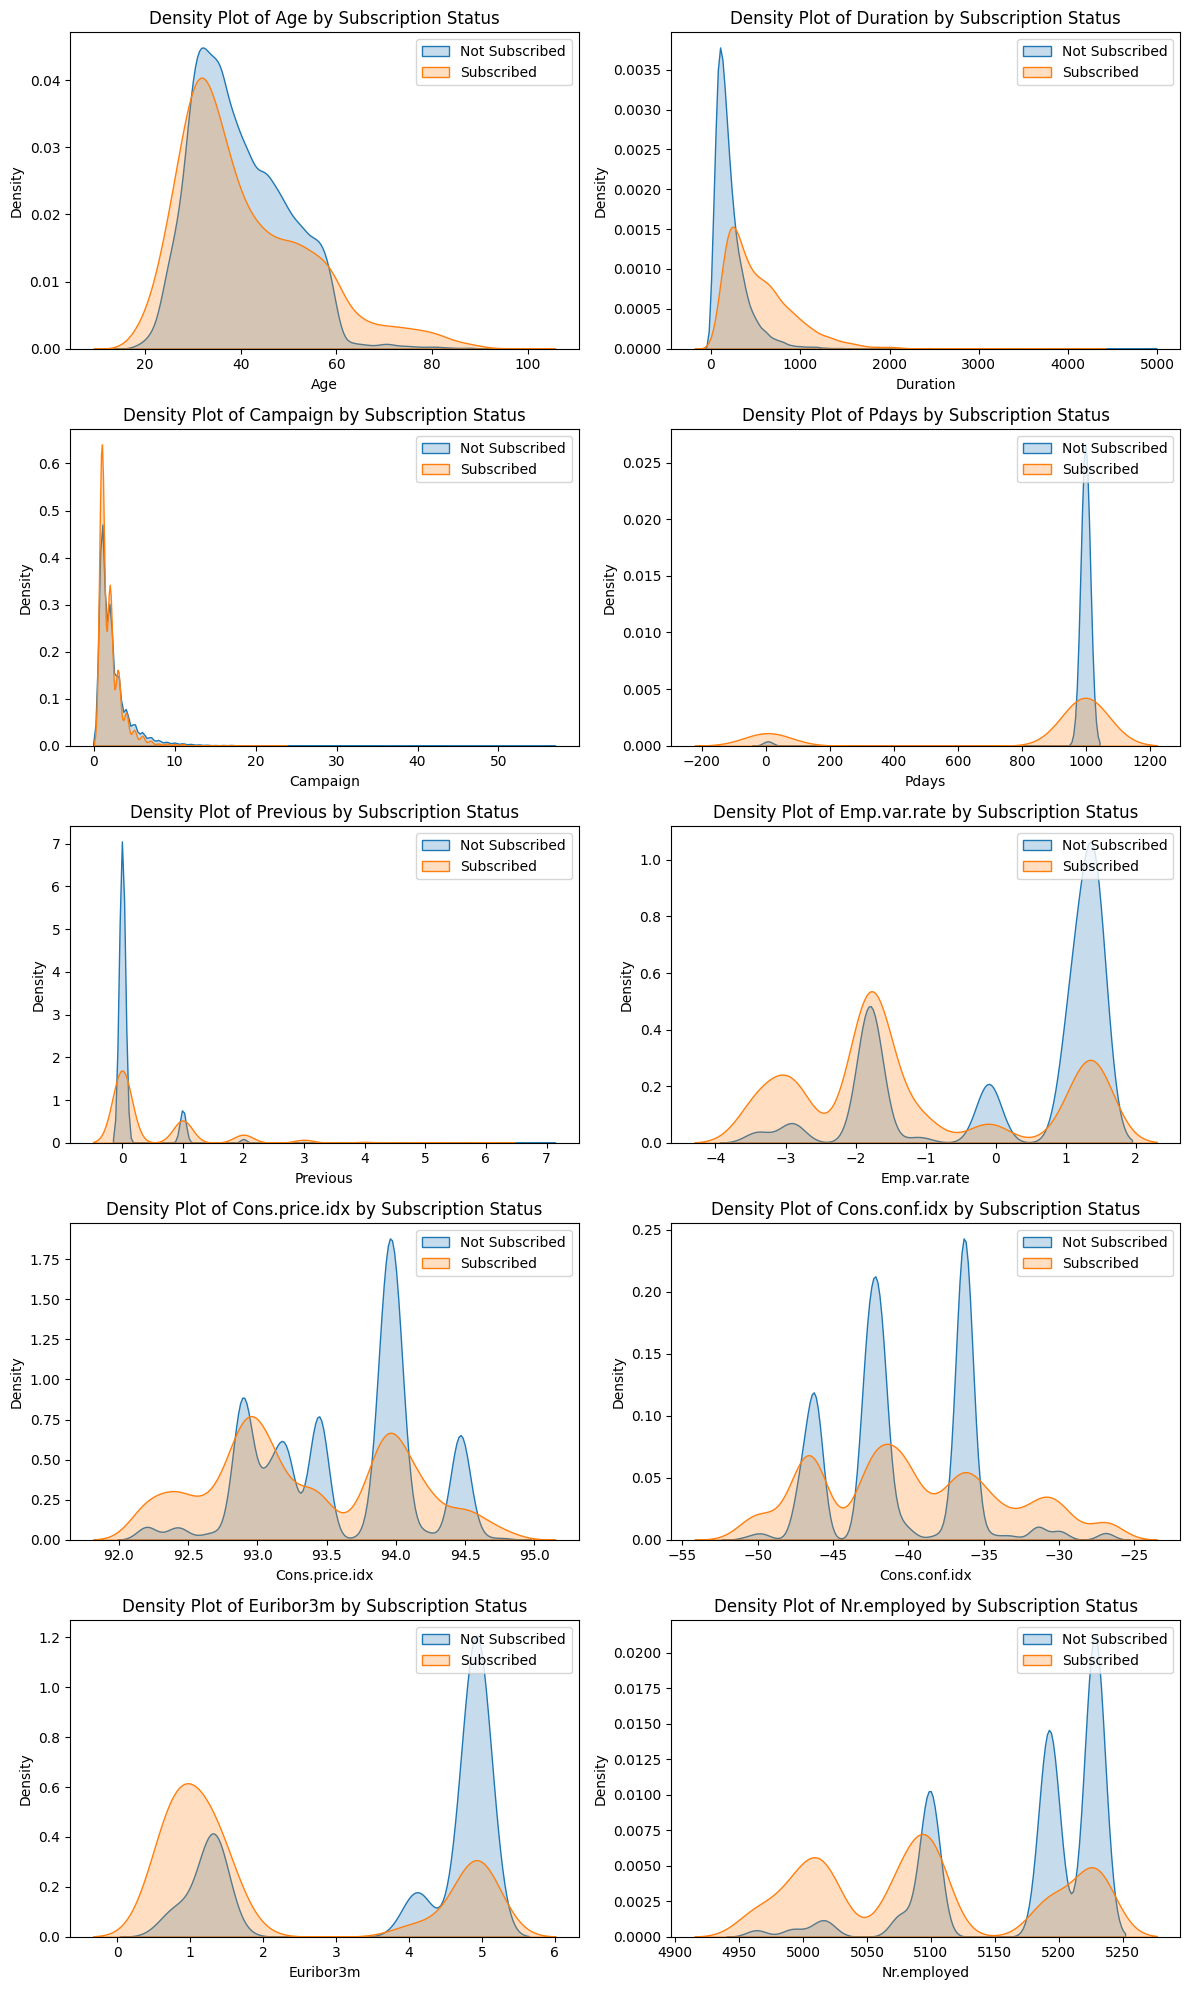

In [18]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2

    sns.kdeplot(data[data['y'] == 'no'][column], label='Not Subscribed', shade=True, ax=axes[row, col])
    sns.kdeplot(data[data['y'] == 'yes'][column], label='Subscribed', shade=True, ax=axes[row, col])
    axes[row, col].set_xlabel(column.capitalize())
    axes[row, col].set_ylabel('Density')
    axes[row, col].set_title(f'Density Plot of {column.capitalize()} by Subscription Status')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

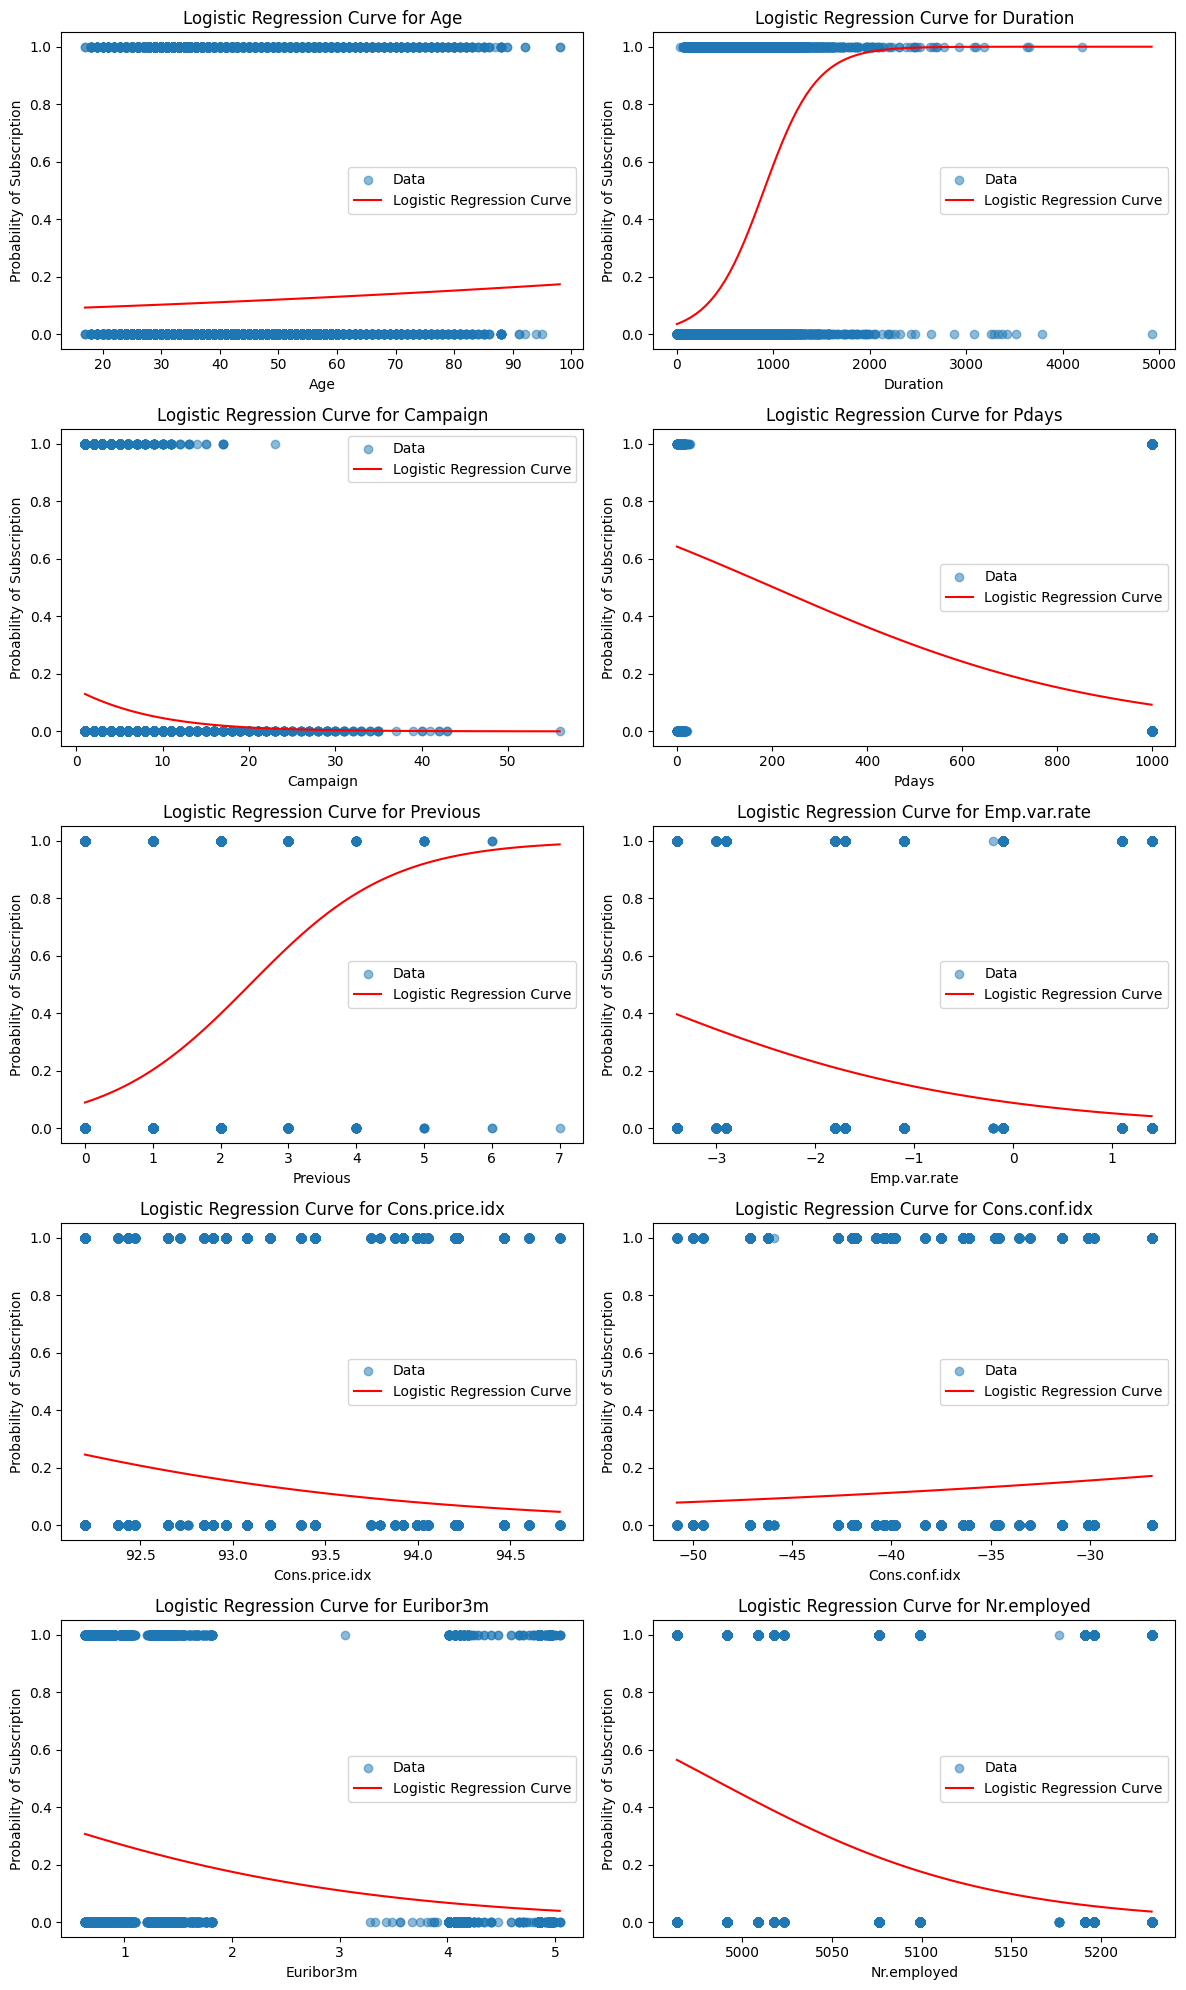

In [19]:
import statsmodels.api as sm

data['y_numeric'] = data['y'].map({'yes': 1, 'no': 0})

fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 20))

for i, column in enumerate(numerical_columns):
    row = i // 2
    col = i % 2

    cleaned_data = data.dropna(subset=[column])
    cleaned_data = cleaned_data[~cleaned_data[column].isin([np.inf, -np.inf])]

    X = sm.add_constant(cleaned_data[column])
    y = cleaned_data['y_numeric']
    logit_model = sm.Logit(y, X).fit(disp=0)

    values = np.linspace(cleaned_data[column].min(), cleaned_data[column].max(), 100)
    X_plot = sm.add_constant(values)

    probabilities = logit_model.predict(X_plot)

    axes[row, col].scatter(cleaned_data[column], cleaned_data['y_numeric'], alpha=0.5, label='Data')
    axes[row, col].plot(values, probabilities, color='red', label='Logistic Regression Curve')
    axes[row, col].set_xlabel(column.capitalize())
    axes[row, col].set_ylabel('Probability of Subscription')
    axes[row, col].set_title(f'Logistic Regression Curve for {column.capitalize()}')
    axes[row, col].legend()

plt.tight_layout()
plt.show()

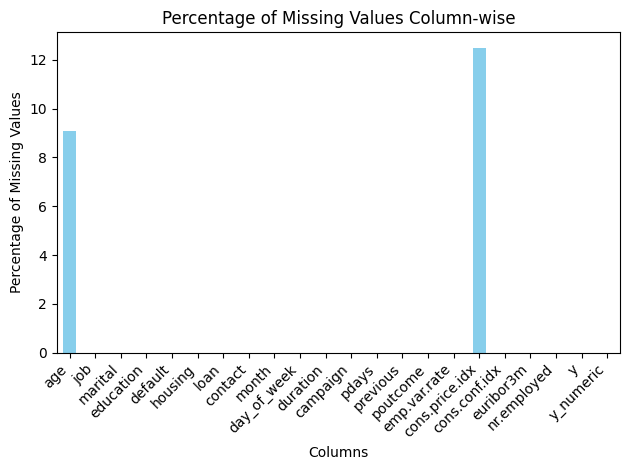

In [20]:
# Calculate percentage of missing values column-wise
missing_values_percentage = (data.isnull().sum() / len(data)) * 100

# Plotting
plt.figure(figsize=(6.4, 4.8))
missing_values_percentage.plot(kind='bar', color='skyblue')
plt.title('Percentage of Missing Values Column-wise')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

**10 percent rule of missing values**:

If the percentage of missing values exceed 10%, the imputations are likel to introduce bias.

The feature 'cons.price.idx' has approximately 12% of missing values.

In [21]:
data['y_binary'] = data['y'].map({'no': 0, 'yes': 1})
features_with_missing_values = data.columns[data.isnull().sum() > 0].tolist()
features_with_missing_values

['age', 'cons.price.idx']

In [22]:
# Calculate missingness correlation with the target variable
missing_values_corr = data.isnull().corrwith(data['y_binary'])

valid_correlation_rows = missing_values_corr.notnull()

print("\nMissingness Correlation with Target variable:")
print(missing_values_corr[valid_correlation_rows])


Missingness Correlation with Target variable:
age               0.005402
cons.price.idx   -0.001380
dtype: float64


In [23]:
from scipy import stats
missing_values = data[data.isnull().any(axis=1)]['y_binary']
non_missing_values = data[~data.isnull().any(axis=1)]['y_binary']

# Perform independent samples t-test
t_statistic, p_value = stats.ttest_ind(missing_values, non_missing_values)

print("Independent Samples t-test:")
print("t-statistic:", t_statistic)
print("p-value:", p_value)

# Interpret the p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: \n\nThere is a significant difference in the distribution or mean of the target variable between observations with and without missing values.")
else:
    print("Fail to reject the null hypothesis: \n\nThere is no significant difference in the distribution or mean of the target variable between observations with and without missing values.")

Independent Samples t-test:
t-statistic: 0.3827329202957437
p-value: 0.7019197778447248
Fail to reject the null hypothesis: 

There is no significant difference in the distribution or mean of the target variable between observations with and without missing values.


In [31]:
!pip install missingno

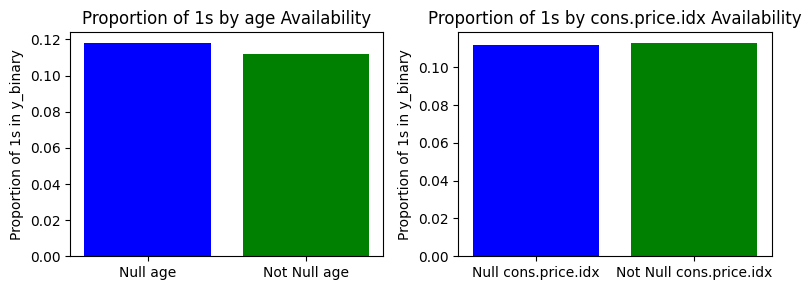

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(8, 3))

for i, feature in enumerate(features_with_missing_values):

    null_feature_rows = data[data[feature].isnull()]
    not_null_feature_rows = data[data[feature].notnull()]

    # Calculate proportion of 1's in 'y_binary' for null and not null rows
    null_prop = null_feature_rows['y_binary'].mean()
    not_null_prop = not_null_feature_rows['y_binary'].mean()

    # Plotting
    ax = axes[i]
    ax.bar(['Null ' + feature, 'Not Null ' + feature], [null_prop, not_null_prop], color=['blue', 'green'])
    ax.set_ylabel('Proportion of 1s in y_binary')
    ax.set_title('Proportion of 1s by ' + feature + ' Availability')

plt.tight_layout()
plt.show()

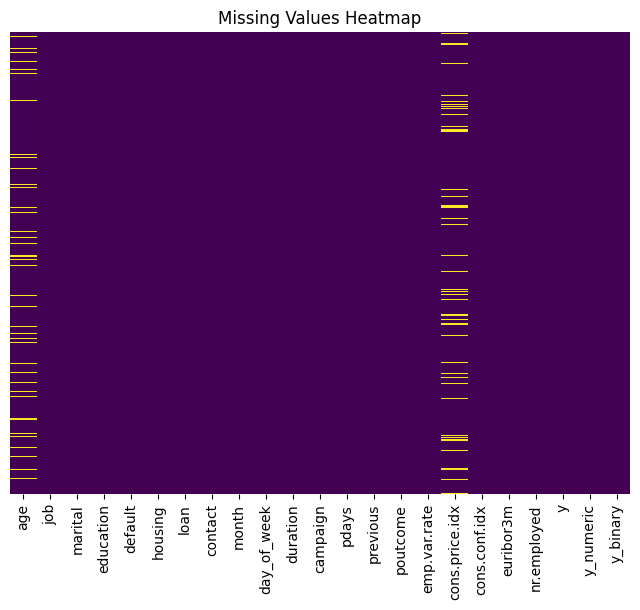

In [34]:
# Visualizing missing values using heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data.isnull(), cmap='viridis', cbar=False, yticklabels=False)
plt.title('Missing Values Heatmap')
plt.show()

In [35]:
missing_col1 = data['age'].isnull()
missing_col2 = data['cons.price.idx'].isnull()
missing_col1.corr(missing_col2)*100

0.20547091396228592

**Observation**:

Considering the weak correlations with the target variable and with each other, it's resonable to conclude that the values are missing completely at random.

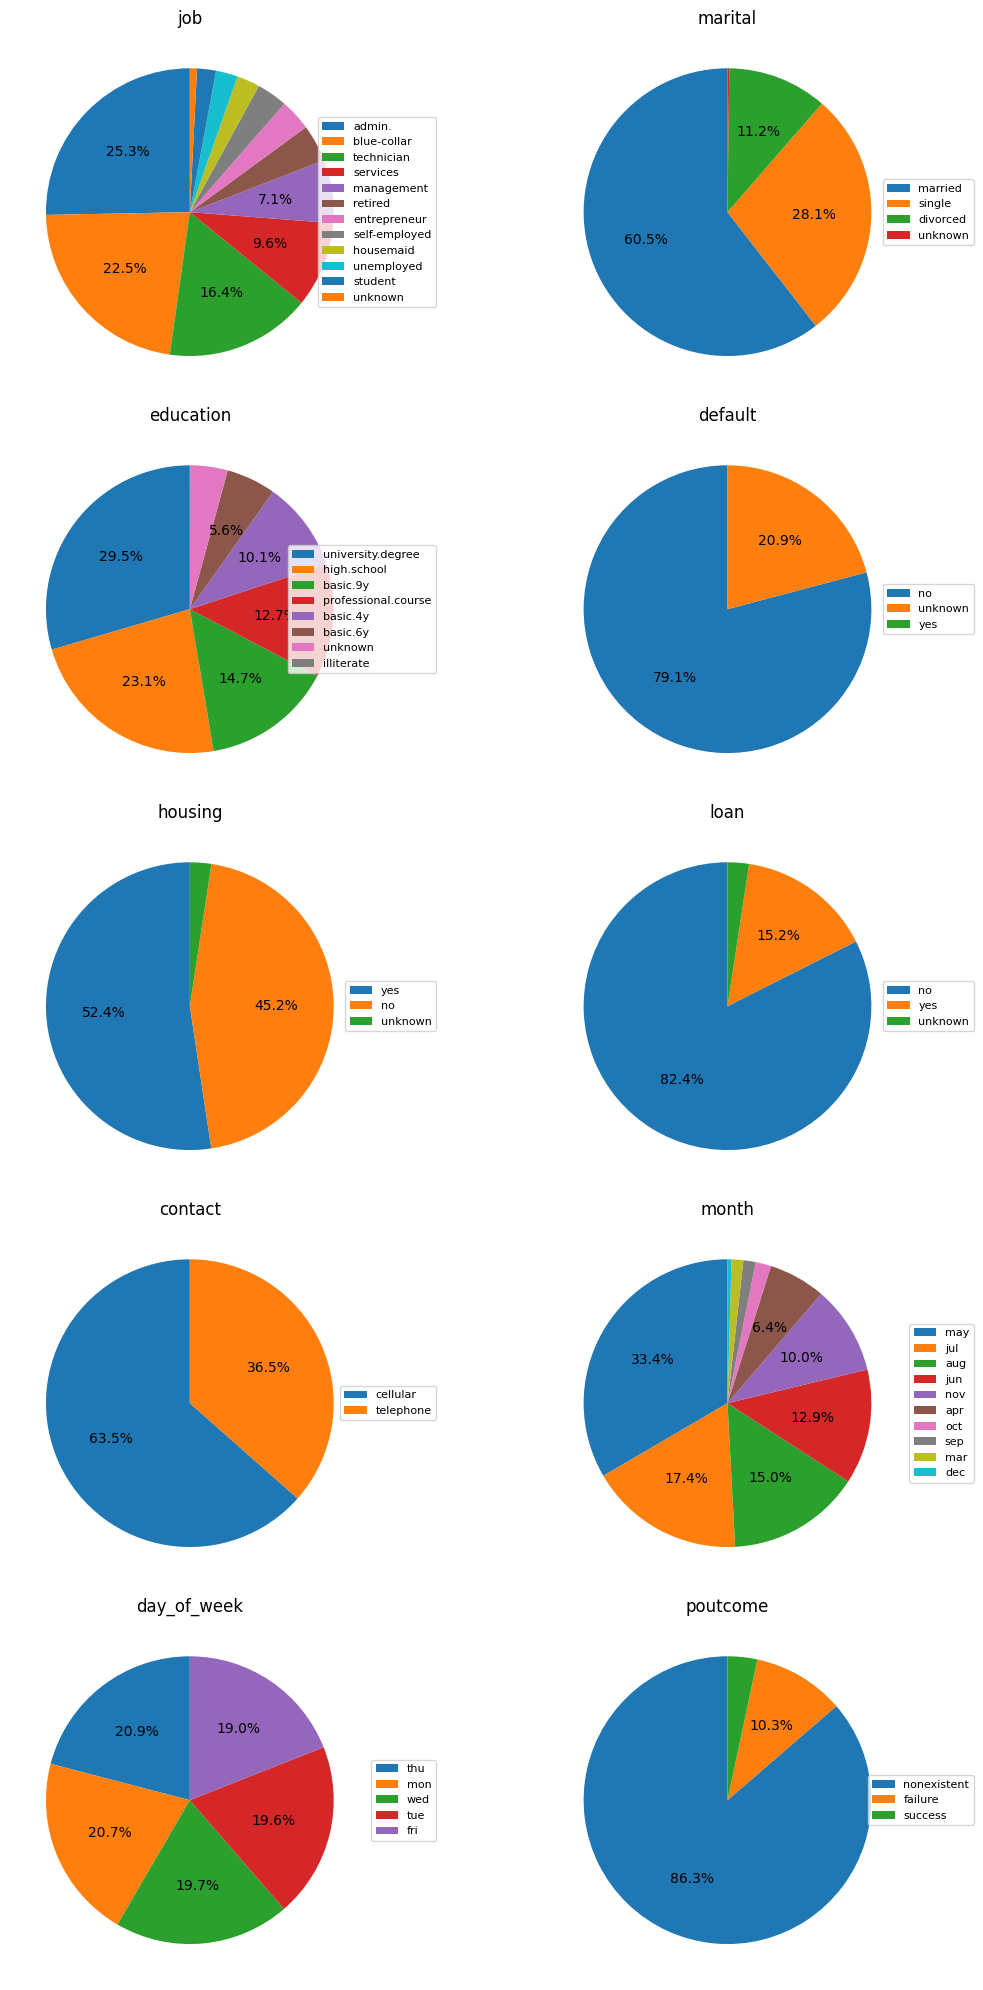

In [36]:
# Define the layout of subplots
num_rows = 5
num_cols = 2

fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 20))

# Flatten the axes for easy iteration
axs = axs.flatten()

# Iterate through each categorical column and plot pie chart
for i, column in enumerate(categorical_columns):
    ax = axs[i]
    feature_counts = data[column].value_counts()
    ax.pie(feature_counts, labels=None, autopct=lambda p: '{:.1f}%'.format(p) if p > 5 else '', startangle=90)
    ax.set_title(column)
    ax.legend(feature_counts.index, loc="center right", fontsize=8, bbox_to_anchor=(1.2, 0.5))

# Hide empty subplots if there are less than 10 categorical columns
if len(categorical_columns) < num_rows * num_cols:
    for j in range(len(categorical_columns), num_rows * num_cols):
        axs[j].axis('off')

plt.tight_layout()
plt.show()

# Data Manipulation

In [37]:
# Performing One Hot Encoding
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
ohe_cat_cols = encoder.fit_transform(data[categorical_columns])

data1 = data.copy()
data1.drop(columns=categorical_columns, inplace=True)
col_names = encoder.get_feature_names_out().tolist()
ohe_df = pd.DataFrame(ohe_cat_cols, columns=col_names)
data1 = pd.concat([data1, ohe_df], axis=1)

In [38]:
# Imputing missing values with knn
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
data1['y'] = data1['y'].map({'no':0, 'yes':1})
data1_imputed = imputer.fit_transform(data1)
data1 = pd.DataFrame(data1_imputed, columns=data1.columns)
X = data1.drop(columns='y')
y = data1['y']

In [39]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_embedded = tsne.fit_transform(X)

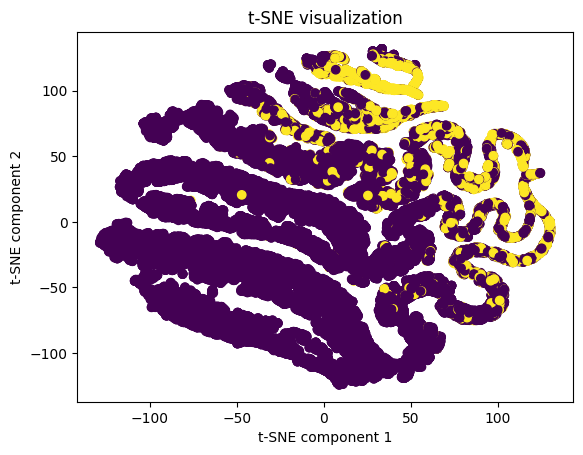

In [41]:
plt.figure(figsize=(6.4, 4.8))
plt.scatter(X_embedded[:, 0], X_embedded[:, 1], marker='o', c=y)
plt.title('t-SNE visualization')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.show()

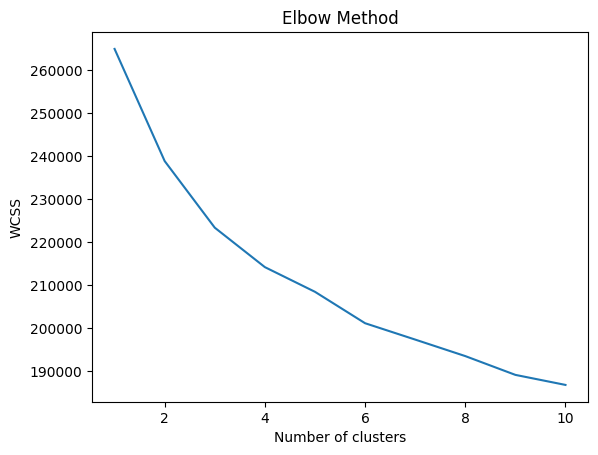

In [98]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

data2 = data1.copy()
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(data2.values)

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow method graph
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [99]:
demographic_feats = ['age','job_admin.', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married',
       'marital_single', 'marital_unknown', 'education_basic.4y',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown']
financial_feats = ['loan_no', 'loan_unknown', 'loan_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'default_no', 'default_unknown', 'default_yes']
socio_economic_feats = ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
temporal_feats = ['month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed']
marketing = ['campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success']
feats_labels = ['demographic features', 'financial features', 'socio economic features', 'temporal features', 'marketing features']

In [100]:
from scipy.stats import chi2_contingency

lst_feats = [demographic_feats, financial_feats, socio_economic_feats, temporal_feats, marketing]

for i in range(len(lst_feats)):
  data2 = data1.copy()
  X_scaled = scaler.fit_transform(data2[lst_feats[i]].values)
  kmeans = KMeans(n_clusters=10, random_state=0)
  data2['cluster'] = kmeans.fit_predict(X_scaled)

  contingency_table = pd.crosstab(data2['cluster'], data2['y'])

  chi2_stat, p_val, dof, expected_freq = chi2_contingency(contingency_table)

  print("clustering based on "+feats_labels[i])
  print(f"Chi-Square Statistic: {chi2_stat:.4f}")
  print(f"p-value: {p_val}")

  alpha = 0.05
  if p_val < alpha:
      print("The association between clusters and the target variable is significant.")
  else:
      print("The association between clusters and the target variable is not significant.")
  print()

clustering based on demographic features
Chi-Square Statistic: 239.0852
p-value: 2.0035196388292303e-46
The association between clusters and the target variable is significant.

clustering based on financial features
Chi-Square Statistic: 413.9445
p-value: 1.447136387885176e-83
The association between clusters and the target variable is significant.

clustering based on socio economic features
Chi-Square Statistic: 6908.6549
p-value: 0.0
The association between clusters and the target variable is significant.

clustering based on temporal features
Chi-Square Statistic: 277.2280
p-value: 1.747461871461287e-54
The association between clusters and the target variable is significant.

clustering based on marketing features
Chi-Square Statistic: 4593.1305
p-value: 0.0
The association between clusters and the target variable is significant.

